Importing necessary libraries required to perform analysis on the Netflix dataset.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Downloading and Reading the dataset.

In [ ]:
! gdown 1ZKlD0XIwkcFuEXjAL1ctYB-oCQ-j240a

Downloading...
From: https://drive.google.com/uc?id=1ZKlD0XIwkcFuEXjAL1ctYB-oCQ-j240a
To: /content/Netflix_project.csv
100% 3.40M/3.40M [00:00<00:00, 65.1MB/s]


In [ ]:
df = pd.read_csv('Netflix_project.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


SOME BASIC EDA QUESTIONS (before data cleaning) :

1.How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
df_movies = df.loc[df['type']=='Movie']
df_movies


In [ ]:
movies_per_year = df_movies.groupby('release_year')[['release_year','title']].aggregate(title_count = ('title','count')).reset_index()
movies_per_year

,release_year,title_count
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,1
...,...,...
68,2017,767
69,2018,767
70,2019,633
71,2020,517


BASIC EDA QUESTIONS

2.Comparison of tv shows vs. movies.

In [ ]:
a=df.type.value_counts()
a

Movie      6131
TV Show    2676
Name: type, dtype: int64

BASIC EDA QUESTIONS
3. Understanding what content is available in different countries

In [ ]:
df_tv = df.loc[df['type']=='TV Show']
df_tv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [ ]:
df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

**NETFLIX PROJECT **

Problem Statement : **Helping Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries**

**Basic Metrics and Non-graphical Analysis.**

Analysis on the dataset.

- Shape
- Various Attributes
- Data Types of the Attributes
- Statistical Summary of the data

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**DATA CLEANING**

- After performing basic analysis on the dataset we can see some of the attributes contain various amount of null values.
- Firstly what I have done is calculated the number of nulls in each attribute.
-As you can see below since 'rating' and 'duration' have hust 3-4 null values those rows have been dropped.
-For the 'director' and 'cast' attributes the null values have been replaced with 'unknown'

In [ ]:
nulls = df.isnull().sum()
nulls

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.dropna(subset=['rating','duration'],inplace=True)

In [ ]:
df.director.fillna('Director unknown',inplace=True)
df.cast.fillna('cast unknown',inplace=True)


**Unnesting and Correction of the attributes**

- For the 'country' attribute there are 2 issues that had to be dealt with :
1) The null values
2) Multiple countries being present in the same row

- To deal with the null values what was done is we replaed the nulls with the 'mode' of the country column.
-For the unnesting of the multiple countries 'apply' and 'split' was used to get only the first country mentioned in the dataset.
- Similar cleaning was done on the 'listed_in' attribute as well which would give us the Genres of the titles.

In [ ]:
df.country.value_counts()

United States                             2815
India                                      972
United Kingdom                             419
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [ ]:
df.country=df.country.fillna(df.country.mode()[0])

In [ ]:
df.country.value_counts()

United States                             3645
India                                      972
United Kingdom                             419
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [ ]:
df.country=df.country.apply(lambda x: x.split(", ")[0])

In [ ]:
df.country.value_counts().head(10)

United States     4037
India             1008
United Kingdom     626
Canada             271
Japan              258
France             212
South Korea        211
Spain              181
Mexico             134
Australia          116
Name: country, dtype: int64

In [ ]:
df.listed_in=df.listed_in.apply(lambda x: x.split(", ")[0])
df.listed_in.value_counts().head(10)

Dramas                      1599
Comedies                    1210
Action & Adventure           859
Documentaries                829
International TV Shows       774
Children & Family Movies     605
Crime TV Shows               399
Kids' TV                     387
Stand-Up Comedy              334
Horror Movies                275
Name: listed_in, dtype: int64

**Comparison of TV-Shows and Movies**

In [ ]:
df.type.value_counts()

Movie      6126
TV Show    2674
Name: type, dtype: int64

**Top 10 years with highest content produced**

In [ ]:
df.release_year.value_counts().head(10)

2018    1147
2017    1030
2019    1030
2020     953
2016     902
2021     592
2015     557
2014     352
2013     287
2012     237
Name: release_year, dtype: int64

**No. of contents based on ratings.**

In [ ]:
df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

**Statistical Summary post Cleaning**

In [ ]:
df.describe()

,release_year
count,8800.000000
mean,2014.179886
std,8.822583
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Creating a seperate Movie dataframe**

In [ ]:
df_movies = df.loc[df['type']=='Movie']
df_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,Comedies,A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",Germany,"September 23, 2021",2021,TV-MA,127 min,Dramas,After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",United Arab Emirates,"March 9, 2016",2015,TV-MA,96 min,Dramas,Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,Cult Movies,"A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."


**Creating a seperate TV-show dataframe**

In [ ]:
df_tv = df.loc[df['type']=='TV Show']
df_tv

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Director unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director unknown,cast unknown,United States,"September 24, 2021",2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,TV Dramas,The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Director unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...",Japan,"May 1, 2018",2015,TV-Y7,2 Seasons,Anime Series,Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,Director unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,International TV Shows,"During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,Director unknown,"Michael Johnston, Jessica Gee-George, Christin...",United States,"September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,Director unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,International TV Shows,"Strong-willed, middle-class Kashaf and carefre..."


**VISUAL** **ANALYSIS**

**Content through the years**

- Plotted a histogram showing the content created over the years.

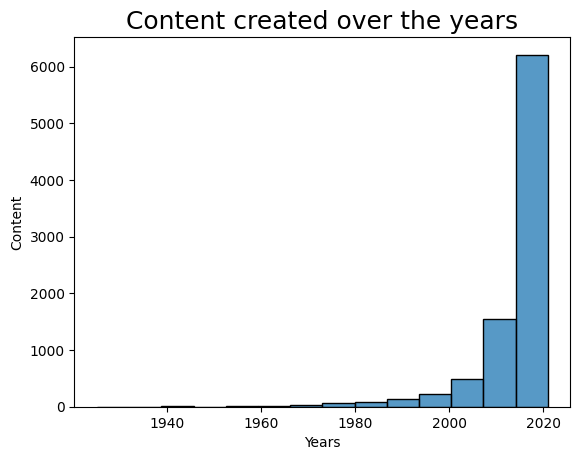

In [ ]:
sns.histplot(df.release_year,bins=14)
plt.xlabel('Years')
plt.ylabel('Content')
plt.title('Content created over the years',fontsize=18)
plt.show()

**Movies throughout the years**

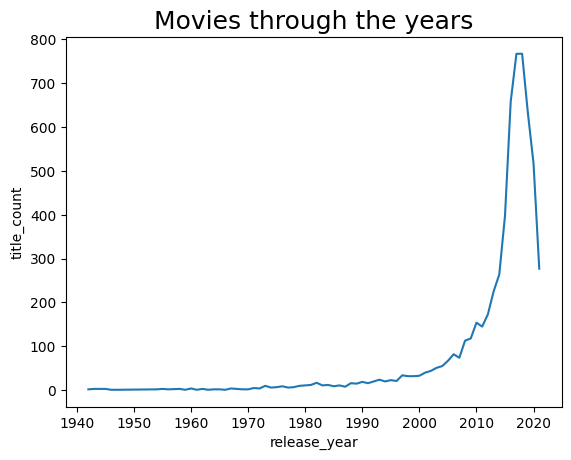

In [ ]:
sns.lineplot(data=movies_per_year,x='release_year',y='title_count')
plt.title('Movies through the years',fontsize=18)
plt.show()

**TV shows throughout the years**

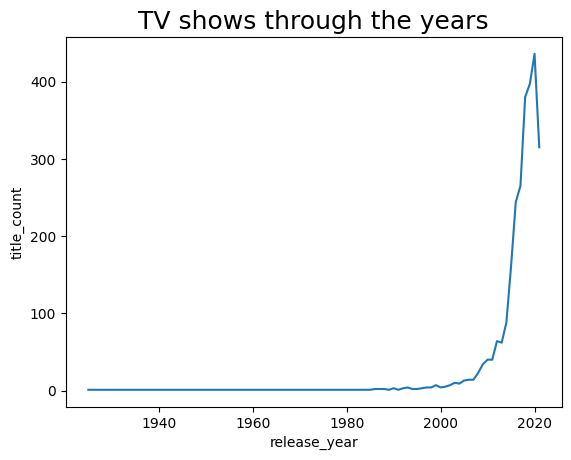

In [ ]:
shows_per_year = df_tv.groupby('release_year')[['release_year','title']].aggregate(title_count = ('title','count')).reset_index()
shows_per_year
sns.lineplot(data=shows_per_year,x='release_year',y='title_count')
plt.title('TV shows through the years',fontsize=18)
plt.show()

**Content per rating**

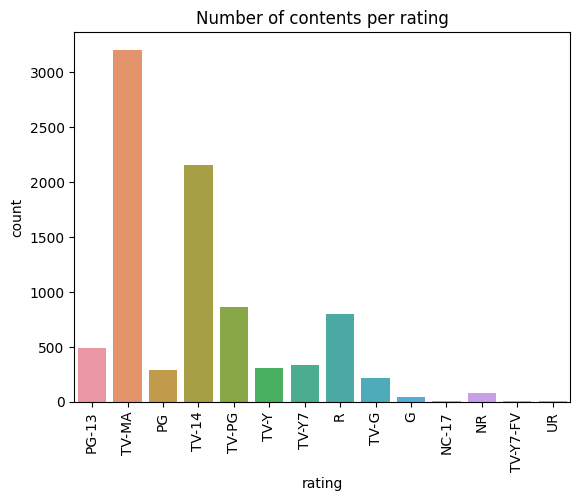

In [ ]:
sns.countplot(x=df.rating)
plt.title("Number of contents per rating")
plt.xticks(rotation=90)
plt.show()

<ipython-input-54-5d499bfea5f5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.release_year)


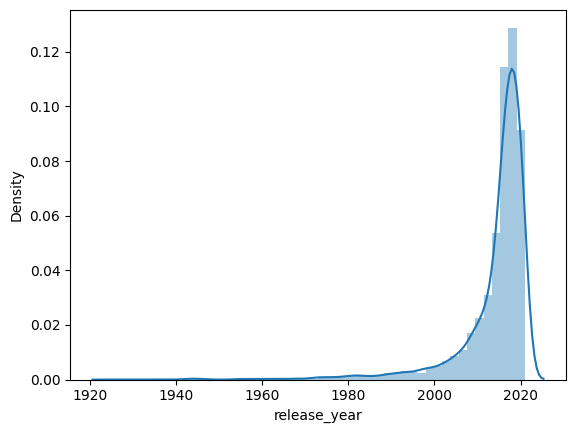

In [ ]:
sns.distplot(df.release_year)
plt.show()

From the Box-plot plotted below we can see that the graph is slightly negatively skewed and all the outliers as well can be seen.

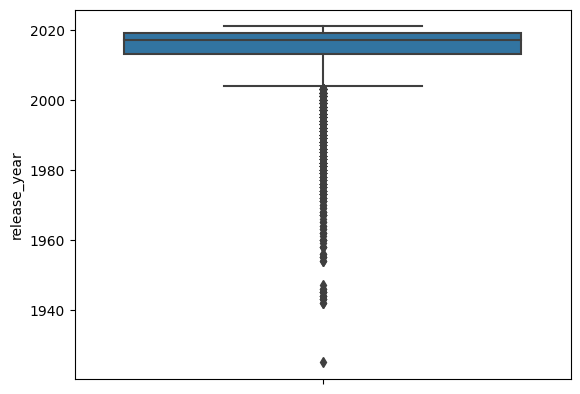

In [ ]:

sns.boxplot(y=df['release_year'])
plt.ylabel=('Years')
plt.show()

**Top 10 countries with highest content streamed**

In [ ]:
top_10_countries = df['country'].value_counts()[:9].reset_index()
top_10_countries.columns = ['country','title_count']
top_10_countries


,country,title_count
0,United States,4037
1,India,1008
2,United Kingdom,626
3,Canada,271
4,Japan,258
5,France,212
6,South Korea,211
7,Spain,181
8,Mexico,134


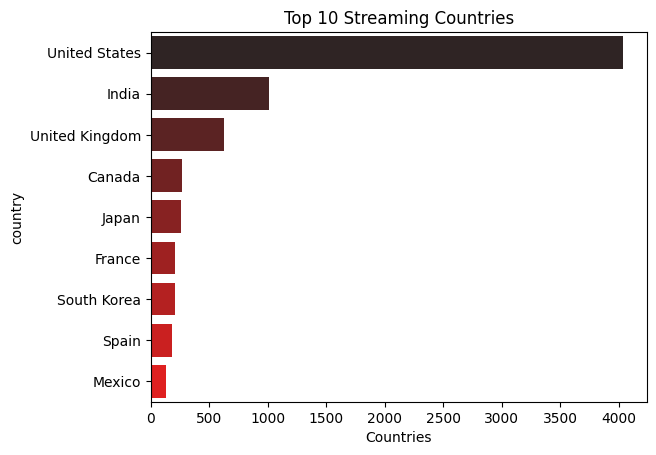

In [ ]:

top_10_c = sns.countplot(y=df.country,order = df.country.value_counts().index[:9],palette='dark:red')
plt.title('Top 10 Streaming Countries')
plt.xlabel("Countries")
plt.show()

**Top 10 ratings with highest number of titles**

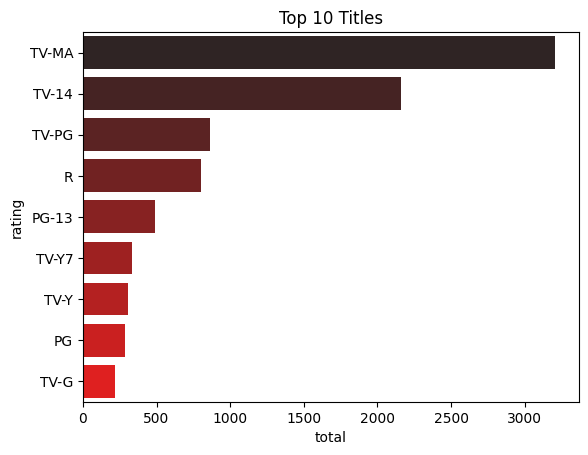

In [ ]:

top_10_c = sns.countplot(y=df.rating,order = df.rating.value_counts().index[:9],palette='dark:red')
plt.title('Top 10 Titles')
plt.xlabel("total")
plt.show()

**Top 10 Genres**

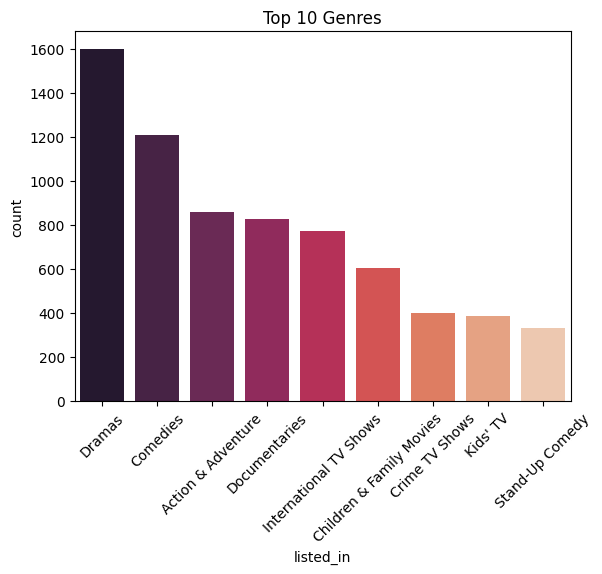

In [ ]:

top_10_c = sns.countplot(x=df.listed_in,order = df.listed_in.value_counts().index[:9],palette='rocket')
plt.xticks(rotation = 45)
plt.title('Top 10 Genres')
plt.show()

**Top 5 directors**

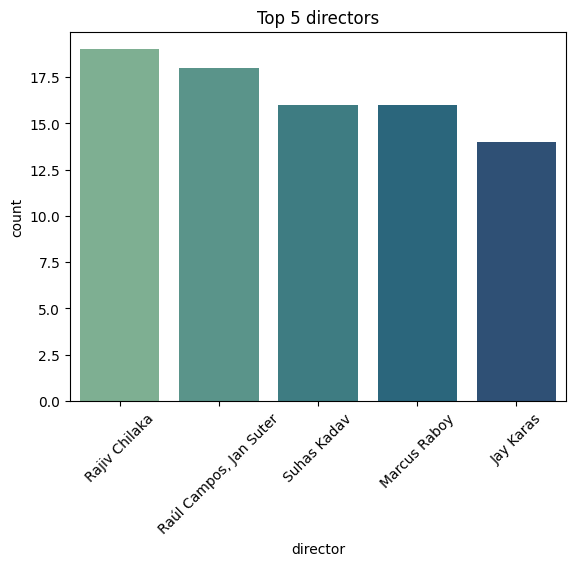

In [ ]:

top_10_c = sns.countplot(x=df.director,order = df.director.value_counts().index[1:6],palette='crest')
plt.xticks(rotation = 45)
plt.title('Top 5 directors')
plt.show()

**Comparison between Movies and TV shows**

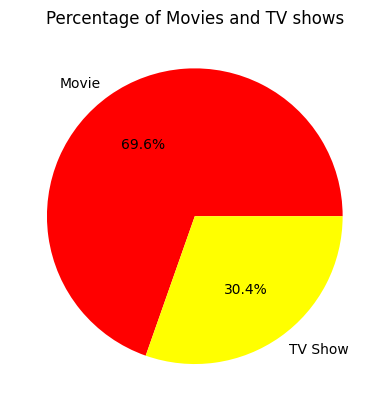

In [ ]:

comparison = plt.pie(df.type.value_counts(),labels=df.type.value_counts().index, colors =['red','yellow'],autopct='%1.1f%%')
plt.title("Percentage of Movies and TV shows")
plt.show()

**Bi-Variate Analysis showing the comparison of Movies and TV shows based on the ratings**

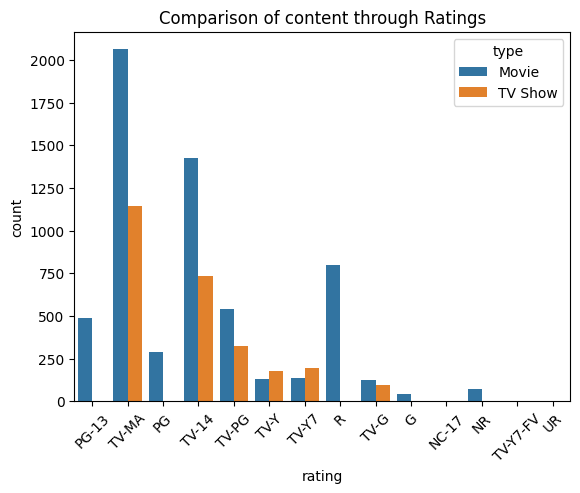

In [ ]:
compare_ratings = sns.countplot(x=df.rating,hue = df.type)
plt.xticks(rotation=45)
plt.title("Comparison of content through Ratings")
plt.show()


**Sub-plot showing the Top Genres comparison between Movies and Tv-shows**

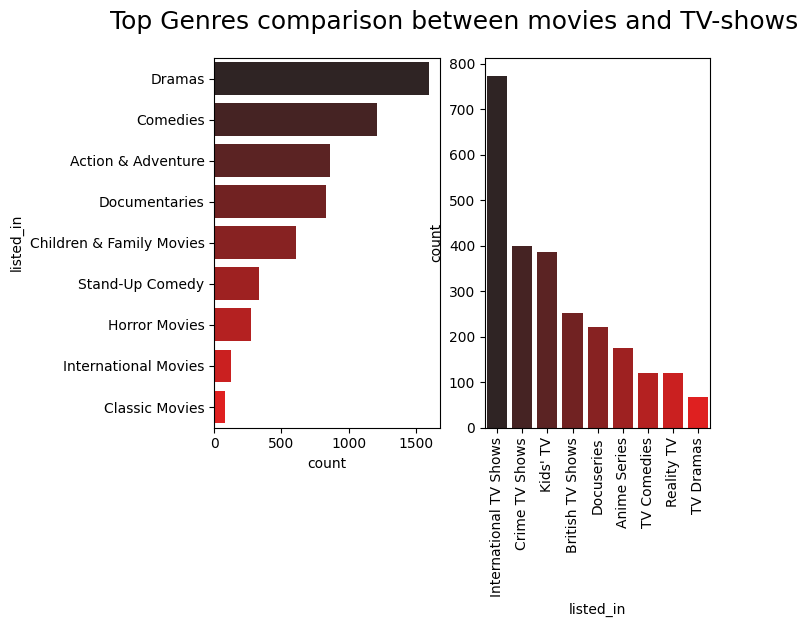

In [ ]:
fig , ax = plt.subplots(1,2,)

sns.countplot(y=df_movies.listed_in,order=df_movies.listed_in.value_counts().index[:9], ax=ax[0],palette = 'dark:red')
plt.xticks(rotation=90)
sns.countplot(x=df_tv.listed_in,order=df_tv.listed_in.value_counts().index[:9],ax=ax[1],palette = 'dark:red')
plt.suptitle("Top Genres comparison between movies and TV-shows",fontsize = 18)
plt.show()



 For duration analysis for movies the attribute had to be cleaned first
 - Firstly the numeric part of the 'duration' column was fetched.
 - Datatype of the column was converted.

In [ ]:
df_movies.duration = df_movies.duration.apply(lambda x: x.split(" ")[0])
df_movies.duration=df_movies.duration.astype("int")
df_movies.duration.info()

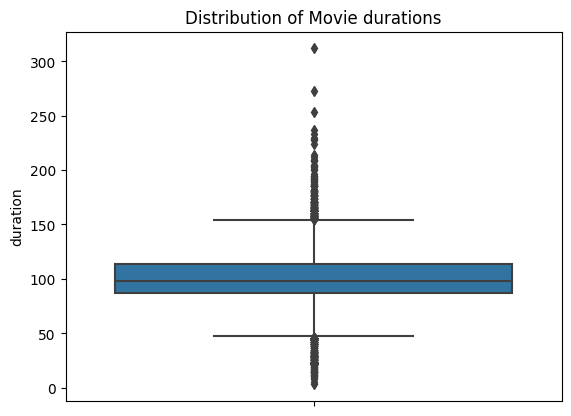

In [ ]:
sns.boxplot(y=df_movies.duration)
plt.title("Distribution of Movie durations")
plt.show()


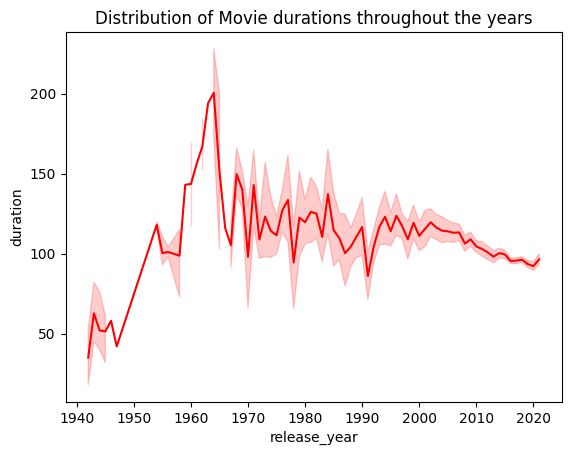

In [ ]:
sns.lineplot(data=df_movies,x='release_year',y='duration',color='red')
plt.title("Distribution of Movie durations throughout the years")
plt.show()

**TV-show duration ditribution**

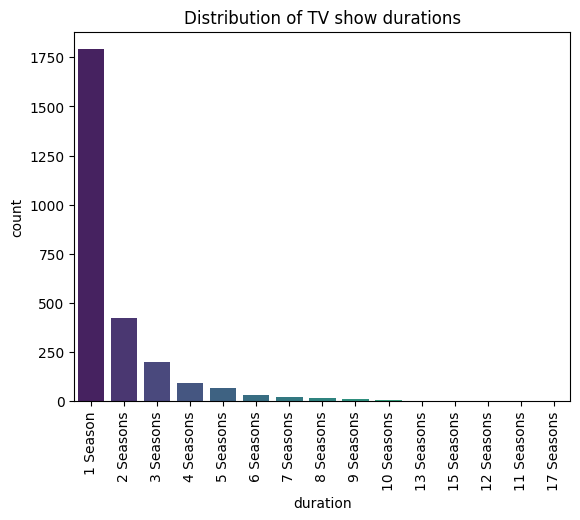

In [ ]:
sns.countplot(x=df_tv.duration,order=df_tv.duration.value_counts().index,palette='viridis')
plt.title('Distribution of TV show durations')
plt.xticks(rotation=90)
plt.show()